In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import numpy as np


In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
churn_data = churn_data.drop(labels='RowNumber', axis=1) #Удаление лишней информации

1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

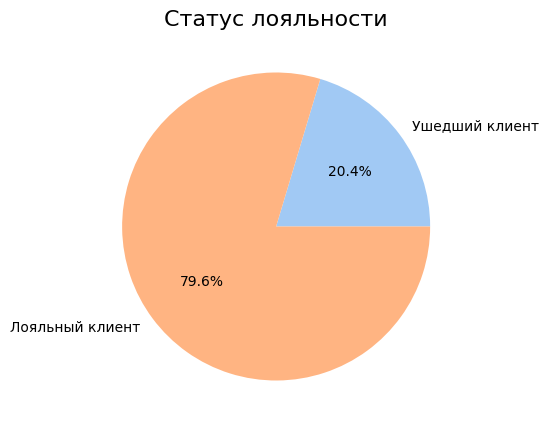

In [4]:
fig, axes = plt.subplots(figsize=(5, 5))
colors = sns.color_palette('pastel')[0:5]
exited = churn_data['Exited'].value_counts().sort_values(ascending=True)
labels = ['Ушедший клиент', 'Лояльный клиент']
pie = axes.pie(
    exited,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors
)
title = axes.set_title('Cтатус лояльности', fontsize=16)
plt.show(pie)

В представленных данных пятая часть представляет ушедших клиентов.

2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

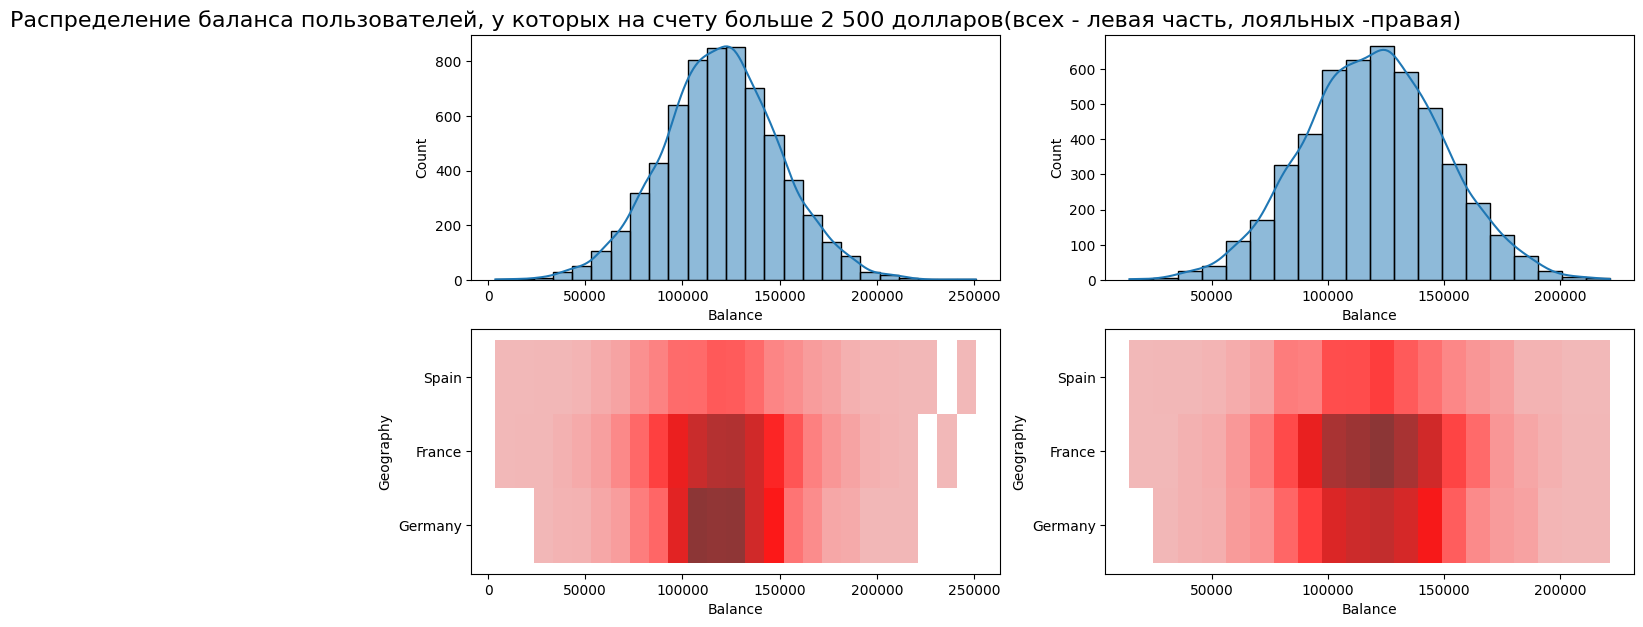

In [5]:
balance = churn_data[churn_data['Balance'] > 2500]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
gis_1 = sns.histplot(
    data=balance,
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0, 0]
)
gis_1.set_title(
    'Распределение баланса пользователей, у которых на счету больше 2 500 долларов(всех - левая часть, лояльных -правая)',
    fontsize=16
)
gis_2 = sns.histplot(
    data=balance,
    x='Balance',
    y='Geography',
    bins=25,
    color='red',
    ax=axes[1, 0]
);

gis_11 = sns.histplot(
    data=balance[balance['Exited']==0],
    x='Balance',
    
    bins=20,#уменьшено на пятую часть(ушедшие клиенты)
    kde=True,
    ax=axes[0, 1]
);
gis_22 = sns.histplot(
    data=balance[balance['Exited']==0],
    x='Balance',
    y='Geography',
    bins=20,
    color='red',
    ax=axes[1, 1],
);

Клиенты, у которых на счетах больше 2500 долларов, равномерно распределены в данном наборе данных(нормальное распределение). Наиболее многочисленная группа клиентов со среднем балансом представляет Германию, затем Францию. В Испании баланс клиентов распределен более равномерно. На выборке лояльных клиентов - в лидерах Франция. В выборке лояльных клиентов - число клиентов со средним балансом резко уменьшилось(600 против 800), возможно из-за оттока клиентов со средним балансом в Германии.

3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.



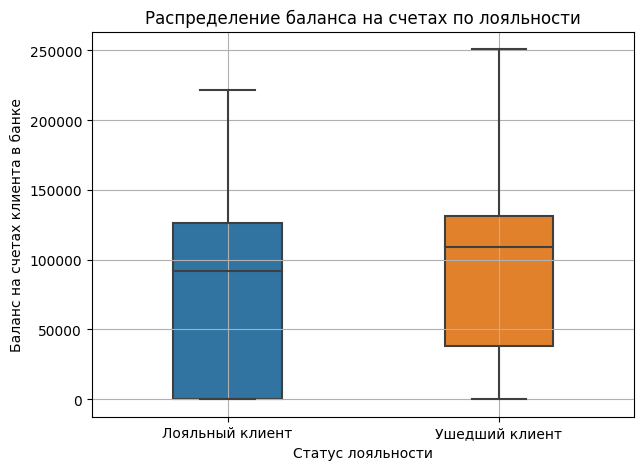

In [6]:
fig = plt.figure(figsize=(7, 5))
boxplot = sns.boxplot(
    data=churn_data,
    x='Exited',
    y='Balance',
    orient='v',
    width=0.4,       
)
labels = ['Лояльный клиент', 'Ушедший клиент']
boxplot.set_title('Распределение баланса на счетах по лояльности');
boxplot.set_xlabel('Cтатус лояльности');
boxplot.set_ylabel('Баланс на счетах клиента в банке');
boxplot.set_xticks([0,1], labels=labels);
boxplot.grid()


Данный график подтверждает предыдущий вывод- большинство ушедших клиентов со среднем балансом счетов. Также заметно, что ушли редкие клиенты с максимальным балансом на счетах.
Медианный баланс лояльных клиентов меньше медианы баланса ушедших клиентов. Возможно банку необходимо увеличить привлекательность размещения средств больше 50000

4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

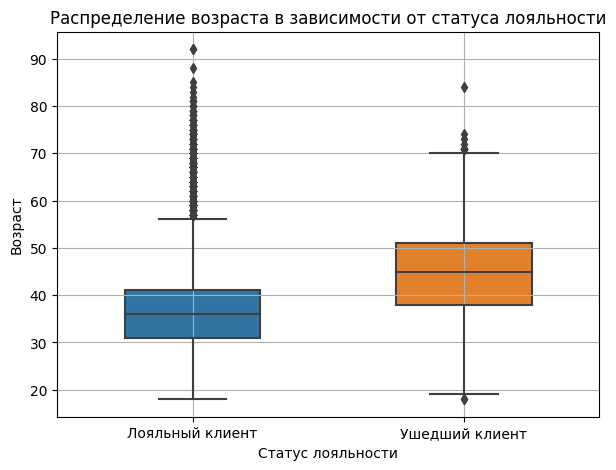

In [7]:
fig = plt.figure(figsize=(7, 5))
boxplot = sns.boxplot(
    data=churn_data,
    x='Exited',
    y='Age',
    orient='v',
    width=0.5,
    order=[0, 1]    
)
labels = ['Лояльный клиент', 'Ушедший клиент']
boxplot.set_title('Распределение возраста в зависимости от статуса лояльности');
boxplot.set_xlabel('Cтатус лояльности');
boxplot.set_ylabel('Возраст');
boxplot.set_xticks([0,1], labels=labels);
boxplot.grid()

В группе лояльных клиентов больше потенциальных выбросов. Лояльные клиенты находятся в возрасте 30-40, ушедшие клиенты: 40-50 лет. Банку необходимо обратить больше внимания на клиентов в возрасте более 40 лет.

5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

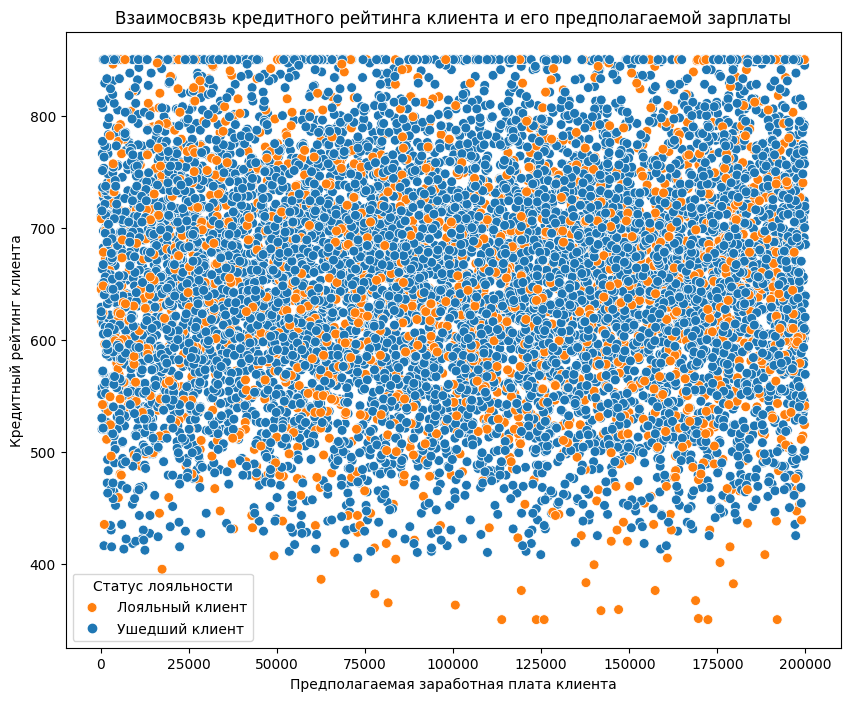

In [8]:
fig = plt.figure(figsize=(10, 8))

scatterplot = sns.scatterplot(
    data=churn_data, 
    y='CreditScore', 
    x='EstimatedSalary',
    hue='Exited',
    s=50,
);
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты');
scatterplot.set_xlabel('Предполагаемая заработная плата клиента');
scatterplot.set_ylabel('Кредитный рейтинг клиента');
scatterplot.legend(labels=['Лояльный клиент', 'Ушедший клиент'], title="Cтатус лояльности");

Взаимосвязь между признаками отсутствует в обеих группах

6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [9]:
proportion= (churn_data.groupby(['Gender'])['Exited'].value_counts(
    ascending=False, normalize=True
)*100
).round(1).reset_index(name='Count')
#Замена значений в столбце статус для правильного отображения легенды
proportion['Exited'] = proportion['Exited'].apply(
    lambda x: 'Лояльный клиент' if x == 0 else 'Ушедший клиент'
)
proportion

,Gender,Exited,Count
0,Female,Лояльный клиент,74.9
1,Female,Ушедший клиент,25.1
2,Male,Лояльный клиент,83.5
3,Male,Ушедший клиент,16.5


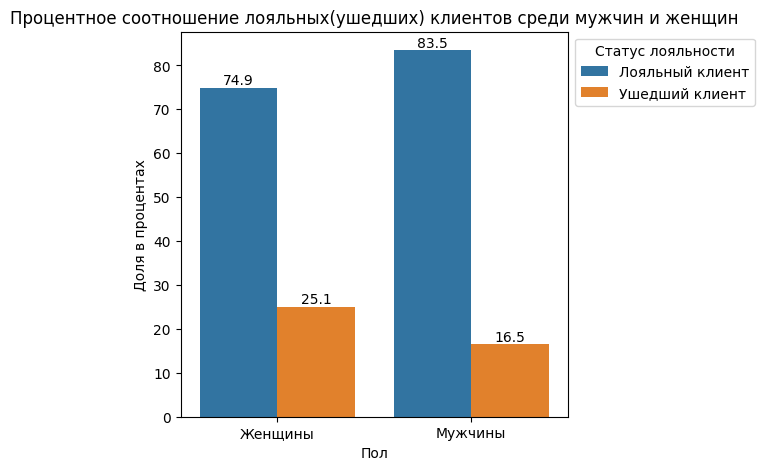

In [10]:
fig = plt.figure(figsize=(5, 5))

barplot = sns.barplot(
    data=proportion,
    x='Gender',
    y= 'Count',
    hue='Exited',
)
barplot.set_title('Процентное соотношение лояльных(ушедших) клиентов среди мужчин и женщин');
barplot.set_xlabel('Пол');
barplot.set_ylabel('Доля в процентах');
barplot.set_xticks([0,1], labels=['Женщины', 'Мужчины']);
barplot.legend( title="Статус лояльности", 
               loc='upper left',
               bbox_to_anchor=(1, 1),
               
)
#barplot.grid()
#Аннотирование столбцов
for container in barplot.containers : 
 barplot.bar_label (container) 



Чаще уходят женщины.

7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму

In [11]:
df = churn_data.groupby('Exited')['NumOfProducts'].value_counts(
). reset_index(name='count')
df

,Exited,NumOfProducts,count
0,0,2,4242
1,0,1,3675
2,0,3,46
3,1,1,1409
4,1,2,348
5,1,3,220
6,1,4,60


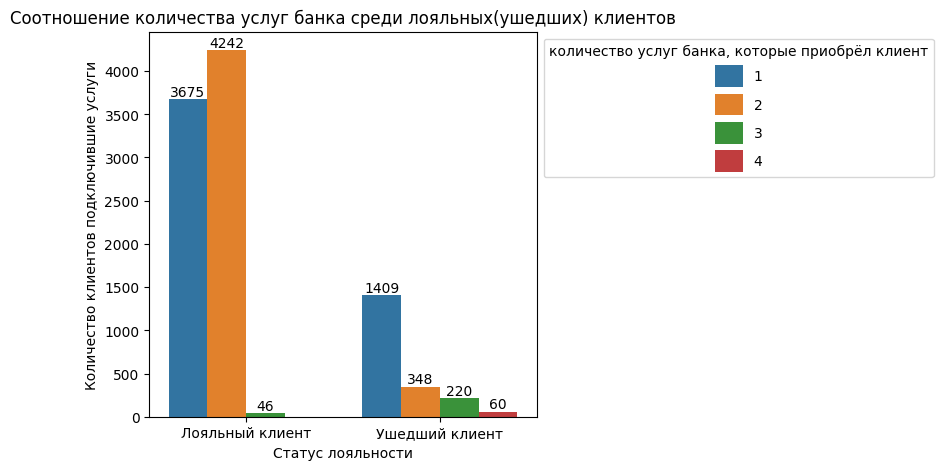

In [12]:
fig = plt.figure(figsize=(5, 5))

barplot = sns.barplot(
    data=df,
    x='Exited',
    y='count',
    hue='NumOfProducts',
);
for container in barplot.containers : 
 barplot.bar_label (container) 
 
barplot.set_title('Cоотношение количества услуг банка среди лояльных(ушедших) клиентов');
barplot.set_xlabel("Cтатус лояльности");
barplot.set_ylabel('Количество клиентов подключившие услуги');
barplot.set_xticks([0,1], labels=['Лояльный клиент', 'Ушедший клиент',]);
barplot.legend( title="количество услуг банка, которые приобрёл клиент", 
               loc='upper left', 
               bbox_to_anchor=(1, 1),
               handleheight=2,
);

Большинство ушедших клиентов воспользовались только одной услугой банка. Возможно для уменьшения оттока клиентов необходимо заинтересовать клиентов пользующихся только одной услугой в других продуктах банка.

8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [13]:
df = churn_data.groupby('IsActiveMember')['Exited'].value_counts().reset_index(name='count')
df['IsActiveMember'] = df['IsActiveMember'].apply(lambda x: 'Активный статус' if x == 1 else 'Пассивный статус')
df['Exited'] = df['Exited'].apply(lambda x: 'Лояльный клиент' if x == 0 else 'Ушедший клиент')
#print(df)
fig = px.sunburst(
    df,
    path=['IsActiveMember', 'Exited'],
    values='count',
    height=600, #высота
    width=600, #ширина
    title='Влияние наличие статуса активного клиента на отток клиентов',
    
)
fig.show()

Активный статус клиента положительно влияет на лояльность к банку. Возможно для уменьшения оттока клиентов, необходимо клиентам имеющим пассивный статус предложить другие продукты банка.

9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [14]:
df = (churn_data.groupby('Geography')['Exited'].mean()*100).reset_index(name='Share')
df

,Geography,Share
0,France,16.154767
1,Germany,32.443204
2,Spain,16.673395


In [15]:
#строим график
fig = px.choropleth(
    data_frame=df, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Share", #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    #range_color=[0, 30e6], #диапазон цвета
    title='Процент ушедших клиентов по странам', #заголовок
    width=700, #ширина
    height=700, #высота
    #color_continuous_scale='Reds' #палитра цветов
    scope='europe', 
    labels={'Share':'Процент ушедших'}
)

#отображаем график
fig.show()


Наибольшие потери клиентов испытывает германский отдел банка. Внешние факторы?

 10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [18]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Очень_бедный"
    elif credit_score >= 500 and credit_score < 601:
        return "Бедный"
    elif credit_score >= 601 and credit_score < 661:
        return "Cредний"
    elif credit_score >= 661 and credit_score < 781:
        return "Хорошо"
    elif credit_score >= 781 and credit_score < 851:
        return "Отличный"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Cредний,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Бедный,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Отличный,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Очень_бедный,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333
Хорошо,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802


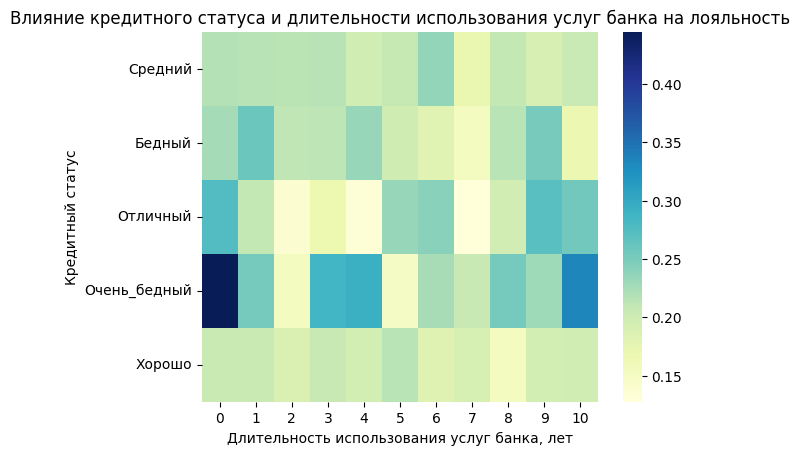

In [19]:
pivot = churn_data.pivot_table(
    columns='Tenure',
    index='CreditScoreCat',
    values='Exited',
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Влияние кредитного статуса и длительности использования услуг банка на лояльность');
heatmap.set_xlabel("Длительность использования услуг банка, лет");
heatmap.set_ylabel('Кредитный статус');
pivot

Чаще всего уходят:клиенты с низким кредитным рейтингом, особенно с малой длительностью использования услуг банка(кроме длительностьи 2 и 5 лет)
Также чаще других уходят клиенты с максимальныи кредитным рейтингом длительностью использования услуг меньше года и 9,10 лет